[Hellow this is ujjwal basnet. Here is my notebook for gradiend descent 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

## creating random regression problem for our model 

In [2]:

from sklearn.datasets import make_regression

In [60]:
x ,y = make_regression(n_samples= 200 , n_features = 1 , n_informative = 1 , noise = 0,random_state = 80) 

In [61]:
x[:5]

array([[ 0.22192908],
       [-0.29256719],
       [ 0.89870465],
       [-0.02825128],
       [-1.03358825]])

###  NOISE 

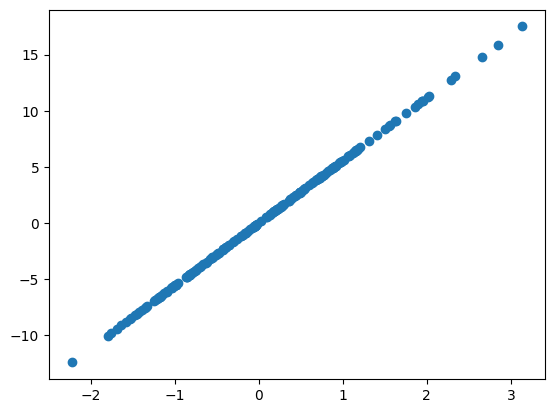

In [62]:
plt.scatter(x ,  y ) 
# just note : data is linearly distributed at noise  : 0 

In [63]:
x , y = make_regression(n_samples = 200 , n_informative =  1 , n_features = 1 , noise = 80 , random_state = 8 )

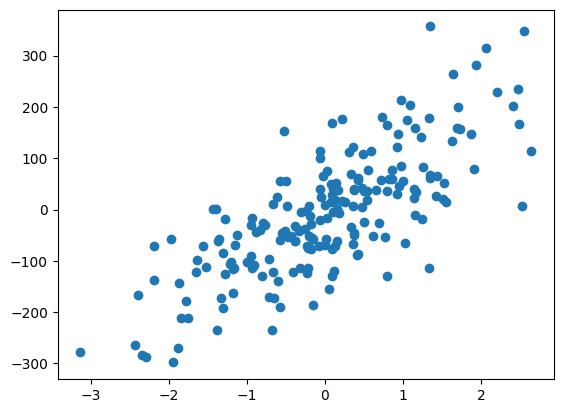

In [64]:
plt.scatter(x , y ) 
#data is not linearly distrubuted 

Train Test Split 

In [65]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest =  train_test_split(x , y , test_size = 0.2 , random_state = 8 ) 

In [66]:
xtrain.ravel()

array([-1.30963322e+00, -5.22880869e-01,  8.44454668e-02, -1.86213348e-01,
        1.72783617e+00,  5.50850056e-01, -1.86979936e+00,  1.13953350e+00,
       -5.71549645e-01, -2.18423032e+00, -4.83540950e-01,  7.70262626e-01,
       -1.18342715e+00, -3.81189391e-01,  1.52475348e+00, -7.22689421e-01,
       -2.22739144e-01,  2.55458326e-01, -3.30986730e-01,  9.30246033e-01,
       -7.14137518e-01, -1.16459117e+00,  1.16614049e+00, -1.38634953e+00,
       -9.21460027e-01,  9.27250714e-01, -6.54389058e-02, -2.30788995e-01,
       -2.43448243e+00, -2.22182077e-02,  1.44252413e+00,  1.33939146e-01,
       -1.74248214e-01,  3.60535849e-01,  7.94827639e-01, -1.33166667e+00,
       -3.26968319e-01, -1.17294371e+00, -1.52653220e+00,  2.23785619e-01,
        9.12047166e-02,  3.75433247e-01,  1.15401648e+00, -6.07493492e-02,
        1.33043062e+00,  3.12643137e-02,  1.34649478e+00, -6.29287299e-02,
        2.15479072e-01,  1.05261111e+00,  1.93494274e+00,  1.38116116e-03,
        1.27762897e-01,  

## Doing From linear Regresssion Class 

In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
lr = LinearRegression()
lr.fit(xtrain , ytrain) 

LinearRegression()

In [12]:
lr.coef_

array([82.15447148])

In [13]:
lr.intercept_

-11.928511123275918

In [14]:
ypred = lr.predict(xtest) 
from sklearn.metrics import r2_score 
r2_score(ytest , ypred) 
#note also accuracy depends one noise for eg noise == 200 ; r2score = 0.2... sometings


0.6619090534543902

Drawing line 

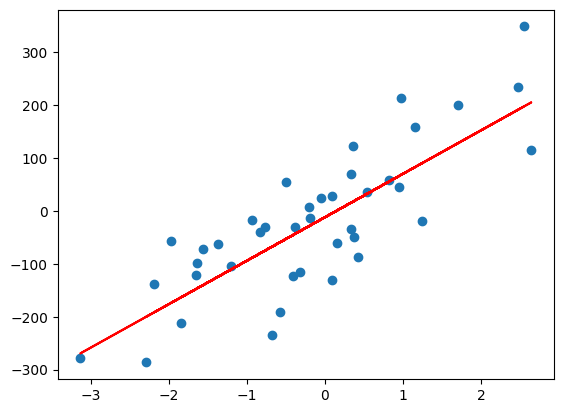

In [15]:
plt.scatter(xtest  , ytest) 
plt.plot(xtest , ypred , color = 'red' ) 
plt.show()

Creating Own grediend descent class 

In [67]:
class GDRegressor: 
    def __init__(self , learning_rate , epochs ) : 
        self.m = 38 #(say) 
        self.b = 80 #(say ) 
        self.l_rate = learning_rate #noe self.lr ma related to accutal linear class so l_rate
        self.epochs = epochs 
        
    #creating fit function 
    def fit(self , x ,y ) : 
        for i in range(self.epochs) : 
            # loss function ma first ma m lai constant lera derivative garda nikleko b ko slope exxpression  ko codema
            slope_b = -2 *np.sum(y - self.m*x.ravel() -self.b) 
            
            #abo b lai constant lera differentation garda nikleko m ko slope ko exression ko codema
            slope_m = -2 * np.sum((y - self.m*x.ravel() - self.b) * x.ravel())
            
             # loss function ma b ko tyo value jasle m const huda minima dinxa 
            self.b = self.b - (self.l_rate * slope_b )
            
            #loss function ma m ko tyo valye jasle b consta huda  minima dinxa 
            self.m = self.m - (self.l_rate * slope_m )
            
    def predict(self  , x) : # tai  y = mx+b bala 
        return self.m * x + self.b
            

In [68]:
gd = GDRegressor(learning_rate = 0.001 , epochs = 100)

In [37]:
gd.fit(xtrain , ytrain) 
ypred1 = gd.predict(xtest)


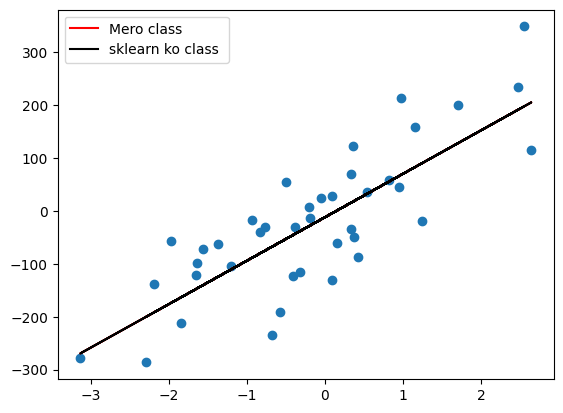

In [52]:
plt.scatter(xtest  , ytest) 
plt.plot(xtest , ypred1 , color = 'red' , label = "Mero class " ) 
plt.plot(xtest , ypred , color = 'black' , label = "sklearn ko class " ) 
plt.legend()
plt.show()


# bane paxi over lap garo wow 
# sklearn ko classs ra mero class le eeutai line draw garerako xa same accuracy ) : 

## Observing With Different Learning Rate 

In [40]:
#setting learning rate 0.1 
gd = GDRegressor(learning_rate = 0.1 , epochs = 100)
gd.fit(xtrain , ytrain ) 
ypred_0_1 = gd.predict(xtest) 

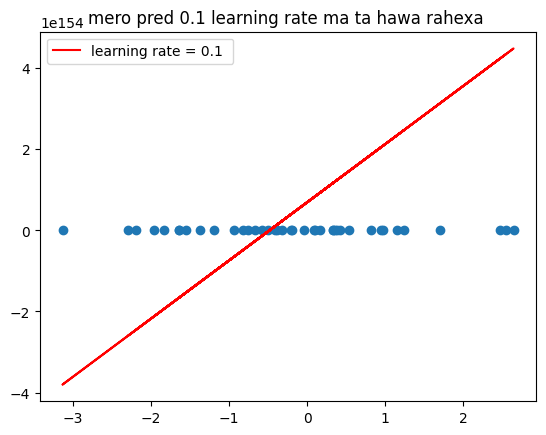

In [42]:
plt.scatter(xtest  , ytest) 
plt.plot(xtest , ypred_0_1, color = 'red' , label = "learning rate = 0.1 "  ) 
plt.legend()
plt.title("mero pred 0.1 learning rate ma ta hawa rahexa ") 
plt.show()


## LEARNING RATE = 0. 001


In [50]:
#setting learning rate 0.1 
gd1 = GDRegressor(learning_rate = 0.01  , epochs = 100)
gd1.fit(xtrain , ytrain) 
ypred = gd.predict(xtest) 

C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_23528\1211354217.py:24: RuntimeWarning: invalid value encountered in add
  return self.m * x + self.b


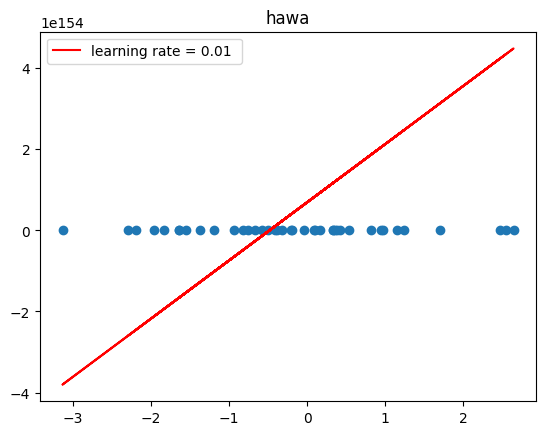

In [56]:
plt.scatter(xtest  , ytest) 
plt.plot(xtest , ypred_0_1, color = 'red' , label = "learning rate = 0.01 "  ) 
plt.legend()
plt.title("hawa") 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


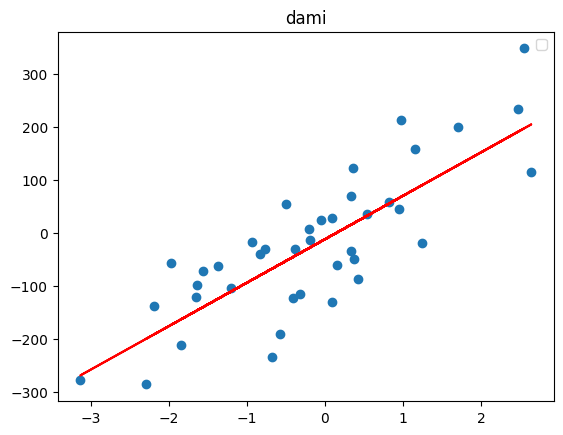

In [57]:
#setting learning rate 0.001 
gd2 = GDRegressor(0.001  ,  100)
gd2.fit(xtrain , ytrain) 
ypred2 = gd2.predict(xtest) 
plt.scatter(xtest  , ytest ) 
plt.plot(xtest , ypred2, color = 'red')
plt.legend()
plt.title("dami") 
plt.show()

## lets do this on loop 

In [58]:
# okey i have to finish another notebook also so i will do add codes after mine exam 
#thank u man 

## Lets do Animation 